In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine_qa = pd.read_csv('data/wine-qa.csv')
wine_qa.head()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,type,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,5,1.9,0.56,34.0,red,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,5,2.6,0.68,67.0,red,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,5,2.3,0.65,54.0,red,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,6,1.9,0.58,60.0,red,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,5,1.9,0.56,34.0,red,0.70


In [3]:
wine_qa.describe()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,0.056034,0.318633,0.994697,7.215307,30.525319,3.218501,5.818378,5.443235,0.531268,115.744574,0.339666
std,1.192712,0.035034,0.145318,0.002999,1.296434,17.749400,0.160787,0.873255,4.757804,0.148806,56.521855,0.164636
min,8.000000,0.009000,0.000000,0.987110,3.800000,1.000000,2.720000,3.000000,0.600000,0.220000,6.000000,0.080000
25%,9.500000,0.038000,0.250000,0.992340,6.400000,17.000000,3.110000,5.000000,1.800000,0.430000,77.000000,0.230000
50%,10.300000,0.047000,0.310000,0.994890,7.000000,29.000000,3.210000,6.000000,3.000000,0.510000,118.000000,0.290000
75%,11.300000,0.065000,0.390000,0.996990,7.700000,41.000000,3.320000,6.000000,8.100000,0.600000,156.000000,0.400000
max,14.900000,0.611000,1.660000,1.038980,15.900000,289.000000,4.010000,9.000000,65.800000,2.000000,440.000000,1.580000


In [4]:
y = wine_qa['quality']
X = wine_qa.drop(columns=['quality'])

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [6]:
label_encoder.fit(X['type'])

LabelEncoder()

In [7]:
color = label_encoder.transform(X['type'])
X = X.drop(columns=['type'])

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
prep = StandardScaler()
prep.fit(X)

StandardScaler()

In [9]:
X_trans = pd.DataFrame(prep.transform(X))
X_trans['type'] = color
X_trans.head()

,0,1,2,3,4,5,6,7,8,9,10,type
0,-0.915464,0.569958,-2.192833,1.034993,0.142473,-1.100140,1.813090,-0.744778,0.193097,-1.446359,2.188833,0
1,-0.580068,1.197975,-2.192833,0.701486,0.451036,-0.311320,-0.115073,-0.597640,0.999579,-0.862469,3.282235,0
2,-0.580068,1.026697,-1.917553,0.768188,0.451036,-0.874763,0.258120,-0.660699,0.797958,-1.092486,2.553300,0
3,-0.580068,0.541412,1.661085,1.101694,3.073817,-0.762074,-0.363868,-0.744778,0.327510,-0.986324,-0.362438,0
4,-0.915464,0.569958,-2.192833,1.034993,0.142473,-1.100140,1.813090,-0.744778,0.193097,-1.446359,2.188833,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans,y)

In [11]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,type
194,-0.663917,0.427227,-0.747613,0.568084,0.296754,-1.325517,0.382517,-0.681719,0.125890,-1.552520,1.277665,0
2373,-0.076974,-0.600437,0.904066,0.768188,1.453864,-0.142287,-0.115073,1.083937,-0.478971,0.146068,-0.423183,1
4920,1.851553,-0.457706,0.078226,-1.786472,-0.937495,-0.874763,0.444716,-0.229795,-0.210144,-0.632451,-0.483928,1
1093,1.264610,0.655596,0.284686,0.484707,1.531004,-1.100140,0.693511,-0.681719,2.209301,-1.499439,-0.180205,0
859,0.593818,0.512865,-0.678793,-0.105599,-0.320370,-0.874763,1.128903,-0.765798,1.940474,-1.623295,1.338409,0


## MODEL

In [12]:
from keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(12,),kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='relu'))

In [13]:
model.output_shape

(None, 1)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 91        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 255
Trainable params: 255
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 12),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 12),
    'dtype': 'float32',
    'units': 12,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': {'class_name': 'L2',
     'config': {'l2': 0.009999999776482582}},
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 7,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'Glor

In [16]:
model.get_weights()

[array([[-0.32489467, -0.3816123 ,  0.01155984, -0.05468524, -0.35854065,
         -0.43729675,  0.14738059,  0.04297781, -0.13706994, -0.48804808,
         -0.02616823, -0.01783574],
        [-0.42106175,  0.0520407 , -0.38673997,  0.18814743, -0.06988883,
         -0.346089  , -0.25199425,  0.43764722, -0.18582845, -0.48245203,
          0.32144642, -0.3283987 ],
        [ 0.23891497, -0.37162912, -0.33758152,  0.17112947,  0.2357266 ,
          0.27448606, -0.10147488,  0.05308211, -0.24381864, -0.28097713,
         -0.37743723, -0.09607792],
        [-0.23520589,  0.28093767, -0.1324352 , -0.1802113 , -0.21695757,
         -0.08303058,  0.27687168, -0.05328441,  0.48272336,  0.34321046,
         -0.2652613 , -0.45436203],
        [ 0.47564673, -0.20601165, -0.20188451,  0.11617661, -0.39830816,
         -0.1005367 , -0.03247261,  0.02821124,  0.28266668,  0.45902812,
          0.02863681,  0.13234663],
        [-0.11624444, -0.18806195,  0.22798407, -0.41850913,  0.18804514,
      

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [18]:
wg, bs = model.layers[2].get_weights()

In [19]:
wg.shape # 1 weight per input per neuron

(7, 1)

In [20]:
wg[:1,:5]

array([[0.7406171]], dtype=float32)

In [21]:
bs.shape # 1 bias per neuron

(1,)

In [22]:
bs[:5]

array([0.], dtype=float32)

## Compile and Fit

In [23]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,type
194,-0.663917,0.427227,-0.747613,0.568084,0.296754,-1.325517,0.382517,-0.681719,0.125890,-1.552520,1.277665,0
2373,-0.076974,-0.600437,0.904066,0.768188,1.453864,-0.142287,-0.115073,1.083937,-0.478971,0.146068,-0.423183,1
4920,1.851553,-0.457706,0.078226,-1.786472,-0.937495,-0.874763,0.444716,-0.229795,-0.210144,-0.632451,-0.483928,1
1093,1.264610,0.655596,0.284686,0.484707,1.531004,-1.100140,0.693511,-0.681719,2.209301,-1.499439,-0.180205,0
859,0.593818,0.512865,-0.678793,-0.105599,-0.320370,-0.874763,1.128903,-0.765798,1.940474,-1.623295,1.338409,0


In [24]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,type
count,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.00000
mean,-0.005927,-0.003703,-0.011316,-0.000439,-0.011167,-0.005544,0.008954,0.002524,0.004388,-0.004509,0.001829,0.75431
std,1.000438,0.992112,0.995044,1.011521,1.005359,1.000103,0.997784,1.007667,1.011380,0.999782,1.010777,0.43054
min,-2.089350,-1.342639,-2.192833,-2.523522,-2.634589,-1.663583,-3.100615,-1.018034,-2.091935,-1.941780,-1.577330,0.00000
25%,-0.831615,-0.514799,-0.541153,-0.794290,-0.628933,-0.762074,-0.674862,-0.765798,-0.680592,-0.678897,-0.666161,1.00000
50%,-0.160823,-0.257883,-0.059414,0.041143,-0.166089,-0.085943,-0.052874,-0.513561,-0.142937,0.039907,-0.301694,1.00000
75%,0.677667,0.227403,0.491146,0.749011,0.373895,0.590188,0.631312,0.571582,0.461924,0.694571,0.366496,1.00000
max,3.696231,15.813640,9.231281,14.768791,6.699425,14.563567,4.923029,12.686822,9.870879,5.737257,7.534354,1.00000


In [25]:
model.compile(loss= 'mse',
              optimizer= 'adam',
              metrics=['mae'])

In [26]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
tensorboard_callback = TensorBoard(log_dir="./logs", histogram_freq=2)

In [27]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=200, 
                    batch_size=128, 
                    verbose=2, 
                    callbacks=[tensorboard_callback])

Epoch 1/200
39/39 - 0s - loss: 30.4141 - mae: 5.4344 - val_loss: 27.3676 - val_mae: 5.1390
Epoch 2/200
39/39 - 0s - loss: 23.9121 - mae: 4.7832 - val_loss: 20.1220 - val_mae: 4.3592
Epoch 3/200
39/39 - 0s - loss: 16.0502 - mae: 3.8459 - val_loss: 11.9322 - val_mae: 3.2494
Epoch 4/200
39/39 - 0s - loss: 8.2565 - mae: 2.5963 - val_loss: 5.3005 - val_mae: 1.9770
Epoch 5/200
39/39 - 0s - loss: 3.5715 - mae: 1.5363 - val_loss: 2.6597 - val_mae: 1.2740
Epoch 6/200
39/39 - 0s - loss: 2.2472 - mae: 1.1343 - val_loss: 2.1376 - val_mae: 1.1072
Epoch 7/200
39/39 - 0s - loss: 1.9633 - mae: 1.0347 - val_loss: 1.9408 - val_mae: 1.0439
Epoch 8/200
39/39 - 0s - loss: 1.7980 - mae: 0.9853 - val_loss: 1.7907 - val_mae: 1.0007
Epoch 9/200
39/39 - 0s - loss: 1.6655 - mae: 0.9443 - val_loss: 1.6765 - val_mae: 0.9653
Epoch 10/200
39/39 - 0s - loss: 1.5636 - mae: 0.9131 - val_loss: 1.5845 - val_mae: 0.9367
Epoch 11/200
39/39 - 0s - loss: 1.4783 - mae: 0.8853 - val_loss: 1.5022 - val_mae: 0.9093
Epoch 12/200


39/39 - 0s - loss: 0.5211 - mae: 0.5388 - val_loss: 0.5845 - val_mae: 0.5652
Epoch 93/200
39/39 - 0s - loss: 0.5225 - mae: 0.5401 - val_loss: 0.5827 - val_mae: 0.5656
Epoch 94/200
39/39 - 0s - loss: 0.5200 - mae: 0.5388 - val_loss: 0.5820 - val_mae: 0.5655
Epoch 95/200
39/39 - 0s - loss: 0.5195 - mae: 0.5370 - val_loss: 0.5802 - val_mae: 0.5639
Epoch 96/200
39/39 - 0s - loss: 0.5173 - mae: 0.5373 - val_loss: 0.5785 - val_mae: 0.5628
Epoch 97/200
39/39 - 0s - loss: 0.5166 - mae: 0.5378 - val_loss: 0.5802 - val_mae: 0.5665
Epoch 98/200
39/39 - 0s - loss: 0.5161 - mae: 0.5375 - val_loss: 0.5756 - val_mae: 0.5628
Epoch 99/200
39/39 - 0s - loss: 0.5142 - mae: 0.5355 - val_loss: 0.5779 - val_mae: 0.5632
Epoch 100/200
39/39 - 0s - loss: 0.5136 - mae: 0.5365 - val_loss: 0.5772 - val_mae: 0.5650
Epoch 101/200
39/39 - 0s - loss: 0.5133 - mae: 0.5378 - val_loss: 0.5776 - val_mae: 0.5649
Epoch 102/200
39/39 - 0s - loss: 0.5116 - mae: 0.5358 - val_loss: 0.5734 - val_mae: 0.5627
Epoch 103/200
39/39 

Epoch 183/200
39/39 - 0s - loss: 0.4753 - mae: 0.5254 - val_loss: 0.5424 - val_mae: 0.5613
Epoch 184/200
39/39 - 0s - loss: 0.4728 - mae: 0.5228 - val_loss: 0.5502 - val_mae: 0.5651
Epoch 185/200
39/39 - 0s - loss: 0.4723 - mae: 0.5223 - val_loss: 0.5433 - val_mae: 0.5598
Epoch 186/200
39/39 - 0s - loss: 0.4769 - mae: 0.5263 - val_loss: 0.5453 - val_mae: 0.5598
Epoch 187/200
39/39 - 0s - loss: 0.4739 - mae: 0.5238 - val_loss: 0.5520 - val_mae: 0.5682
Epoch 188/200
39/39 - 0s - loss: 0.4730 - mae: 0.5234 - val_loss: 0.5437 - val_mae: 0.5612
Epoch 189/200
39/39 - 0s - loss: 0.4727 - mae: 0.5243 - val_loss: 0.5401 - val_mae: 0.5568
Epoch 190/200
39/39 - 0s - loss: 0.4704 - mae: 0.5211 - val_loss: 0.5413 - val_mae: 0.5602
Epoch 191/200
39/39 - 0s - loss: 0.4740 - mae: 0.5246 - val_loss: 0.5398 - val_mae: 0.5605
Epoch 192/200
39/39 - 0s - loss: 0.4709 - mae: 0.5222 - val_loss: 0.5422 - val_mae: 0.5577
Epoch 193/200
39/39 - 0s - loss: 0.4707 - mae: 0.5212 - val_loss: 0.5398 - val_mae: 0.5598

In [28]:
model.fit(X_trans, y)

204/204 [==============================] - 0s 861us/step - loss: 0.4974 - mae: 0.5362


In [29]:
score = model.evaluate(X_test,y_test,batch_size=42,verbose=2)
score

39/39 - 0s - loss: 0.5558 - mae: 0.5625


[0.5558327436447144, 0.5624934434890747]

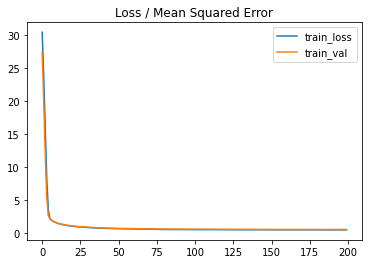

In [30]:
from matplotlib import pyplot
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='train_val')
pyplot.legend()
pyplot.show()

In [31]:
y_pred = model.predict(X_test)

In [32]:
y_pred.round()

array([[5.],
       [6.],
       [6.],
       ...,
       [6.],
       [7.],
       [5.]], dtype=float32)

In [33]:
y_test

1779    6
5570    6
5178    7
4572    6
4264    5
       ..
662     6
1044    6
579     6
2033    8
6405    6
Name: quality, Length: 1625, dtype: int64

In [34]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [35]:
explained_variance_score(y_test,y_pred.round())

0.24055219230188107

In [36]:
mean_squared_error(y_test,y_pred.round())

0.624

In [37]:
r2_score(y_test,y_pred.round())

0.2171368517475034

In [38]:
df_score_nn =  pd.DataFrame()

In [39]:
df_score_nn['error'] = ('mse', 'r2') 

In [40]:
df_score_nn['Full_NN'] = (0.57,0.28) 
df_score_nn['NN_redwine'] = (0.60,0.13) 
df_score_nn['NN_whitewine'] = (0.75,0.09) 

In [41]:
df_score_nn

,error,Full_NN,NN_redwine,NN_whitewine
0,mse,0.57,0.60,0.75
1,r2,0.28,0.13,0.09


In [42]:
model.save("model.h5")